In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
# Read the data
X = pd.read_csv('/content/YSP.csv')
# X_test_full = pd.read_csv('/content/test.csv')

# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['yield_strength'], inplace=True)
y = X.yield_strength             
X.drop(['yield_strength'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
# X_test = X_test_full[my_cols].copy()

# One-hot encode the data (to shorten the code, we use pandas)
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
# X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join='left', axis=1)
# X_train, X_test = X_train.align(X_test, join='left', axis=1)


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
my_model=XGBRegressor(n_estimators=3000, learning_rate=0.05)
my_model.fit(X_train, y_train, early_stopping_rounds = 150, eval_set=[(X_valid, y_valid)], verbose=True)

[06:52:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:341.54
Will train until validation_0-rmse hasn't improved in 150 rounds.
[1]	validation_0-rmse:325.348
[2]	validation_0-rmse:309.847
[3]	validation_0-rmse:295.266
[4]	validation_0-rmse:281.499
[5]	validation_0-rmse:268.289
[6]	validation_0-rmse:255.57
[7]	validation_0-rmse:243.835
[8]	validation_0-rmse:232.439
[9]	validation_0-rmse:221.76
[10]	validation_0-rmse:211.372
[11]	validation_0-rmse:201.784
[12]	validation_0-rmse:192.552
[13]	validation_0-rmse:183.794
[14]	validation_0-rmse:175.583
[15]	validation_0-rmse:167.814
[16]	validation_0-rmse:160.262
[17]	validation_0-rmse:153.165
[18]	validation_0-rmse:146.496
[19]	validation_0-rmse:140.233
[20]	validation_0-rmse:134.14
[21]	validation_0-rmse:128.569
[22]	validation_0-rmse:123.128
[23]	validation_0-rmse:118.111
[24]	validation_0-rmse:113.151
[25]	validation_0-rmse:108.484
[26]	validation

XGBRegressor(learning_rate=0.05, n_estimators=3000)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
prediction = my_model.predict(X_valid)
# mae=mean_absolute_error(prediction, y_valid)
# print(y_valid.head())
# print(mae)
# print(y_valid.mean())
# print(1-mae/y_valid.mean())
r2_LGBM = r2_score(y_valid, prediction)
mse_XGBOOST = mean_squared_error(y_valid, prediction)
mae_XGBOOST = mean_absolute_error(y_valid, prediction)
r2_xgbRegressor = r2_score(y_valid, prediction)
print("Accuracy")
print(1-mae_XGBOOST/np.mean(y_valid))
mse_scaled_XGBOOST = mse_XGBOOST/np.mean(y_valid)
mae_scaled_XGBOOST = mae_XGBOOST/np.mean(y_valid)
print('R\u00b2_score = ' + str(round(r2_xgbRegressor, 2)) + '    Higher is better')
print('mean_squared_error = ' + str(round(mse_scaled_XGBOOST, 2)) + '    Lower is better')
print('mean_absolute_error = ' + str(round(mae_scaled_XGBOOST, 2)) + '   Lower is better')

Accuracy
0.9502948042041103
R²_score = 0.97    Higher is better
mean_squared_error = 1.59    Lower is better
mean_absolute_error = 0.05   Lower is better


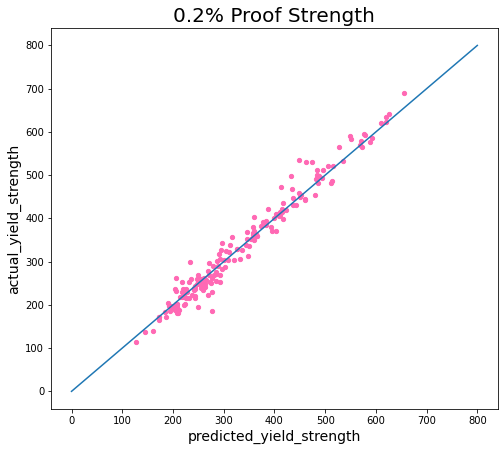

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Plotting graphs for 0.2% Proof Strength and Tensile Strength
fig, (ax0) = plt.subplots(1,figsize=(8,7))

ax0.scatter(prediction, y_valid, color = 'hotpink', s=18)
x3 = np.linspace(0, 800, 1000)
y3 = x3
ax0.plot(x3, y3)
ax0.set_title('0.2% Proof Strength', fontsize = 20)
ax0.set_xlabel('predicted_yield_strength', fontsize = 14)
ax0.set_ylabel('actual_yield_strength', fontsize = 14)

# ax1.scatter(nn_predicted_tensile_strength, actual_tensile_strength, color = 'hotpink', s=18)
# x4 = np.linspace(100, 900, 1000)
# y4 = x4
# ax1.plot(x4, y4)
# ax1.set_title('Tensile Strength', fontsize = 20)
# ax1.set_xlabel('predicted_tensile_strength', fontsize = 14)
# ax1.set_ylabel('actual_tensile_strength', fontsize = 14)

plt.show()